In [ ]:
'''
General #TODO
- Update everything for a performance metric
    - post-processing and data curation
    - Need to update the active learning to accomodate this
- Integration of automation
- Split up the plotting into its own function? 
'''



In [1]:
# Import all libraries at once
import csv, json, time
from datetime import date
import pickle
import os
import json
import numpy as np
import math
from nrc_custom.CCUS_Initiation import Campaign_Initiation
from nrc_custom.CCUS_PostProcess import PostProcessing
from nrc_custom.CCUS_Active_Learning_Noise import ActiveLearning
from nrc_custom.CCUS_N9_workflow import N9_Workflow
from scipy.stats import qmc
from north_c9 import NorthC9
from alicat import FlowController
import nest_asyncio
nest_asyncio.apply()

In [1]:
from nrc_custom.AlicatFlowTest import Test_works
depo_flow_controller_com_port = 'COM28'
for i in range(5):
    a = Test_works(depo_flow_controller_com_port)
    await a.CO2purge()
    print(f'done {i}')

done 0
done 1
done 2
done 3
done 4


In [3]:
#TODO - figure out how to do a class structure with the flow controller. The as below and calling subsequent awaits seems to bring an error when I put depo_flow_count as an input
# to the class and use await in the .py script. Would the other option be to just connect/disconnect everytime and build that into a function? Test this next and see how it will work, and
# run it multiple times w/o getting errors
depo_flow_controller_com_port = 'COM28'
depo_flow_cont = FlowController(f'{depo_flow_controller_com_port}')
# await depo_flow_cont.set_flow_rate(20)
# time.sleep(10)
# await depo_flow_cont.set_flow_rate(0)
# await depo_flow_cont.close()

In [11]:
await depo_flow_cont.set_gas('CO2')
time.sleep(5)
await depo_flow_cont.set_gas('N2')

In [2]:
# Initial User Variables
#date_format = date.today().strftime("%Y_%m_%d")
date_format = '2023_11_01'
root_path = f'C:/Users/Blackr/Documents/CCUS/MAPs/Initiate/{date_format}/'
experiment_name = 'awnb1p10004'
number_runs = 50
test = 'Test_0'
exp_count = 0

# COM PORTS
com_port_Ecell = 'COM27'
depo_flow_controller_com_port = 'COM28'
# combine all com ports into a tuple
com_ports_N9 = (com_port_Ecell,depo_flow_controller_com_port)

In [3]:
# Initiate the campaign
campaign = Campaign_Initiation(root_path,experiment_name,test,number_runs,date_format)
campaign.CCUS_initiation()

In [3]:
# Connect to the robot and start the initialization steps to get automation ready

# connect to N9 and instantiate
c9 = NorthC9('A', network_serial='FT2YOSLD')
c9.get_info()

#TODO connect to URe3
#TODO connect to everything else
#depo_flow_controller = FlowController(f'{depo_flow_controller_com_port}')
#TODO put in some check function/unit tests to ensure everything is connected okay?

# Homing of everything and instantiation of necessary objects
N9_go = N9_Workflow(c9, root_path,experiment_name,exp_count, *com_ports_N9)

#N9_go.homing_procedure()

Connected to C9 at address 65


The following is to be run: awnb1p10004 on Test_0
Initial experiment to run: [1.0, -0.2, 16.0]
RUN EXPERIMENT
PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA
iR for deposition = 41.281373005723324 ohms
Mass Loading All = 0.002185846134677152
Mass Loading Truncated (10 s) = 0.001553810474197372


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


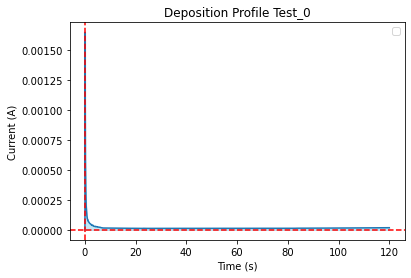

1.0200716715758062e-06
-1.869301797796652e-06
2.1651627690744135e-07
-3.315713072993276e-07
4.02997625315038e-06
-5.1178359967707365e-06
4.98699324680274e-06
-6.0484171626740135e-06
5.915847623327863e-06
-6.9825361492803495e-06
[1.44468673e-06 2.74043792e-07 4.57390612e-06 5.51770520e-06
 6.44919189e-06]
[-1.44468673e-06 -2.74043792e-07 -4.57390612e-06 -5.51770520e-06
 -6.44919189e-06]


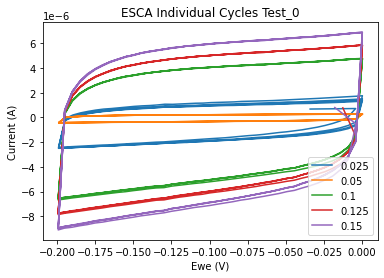

ECSA positive = 4.845989461906555e-05 F
ECSA negative = 4.845989461906555e-05 F


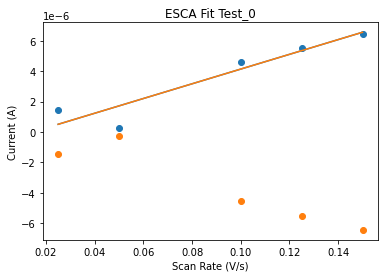

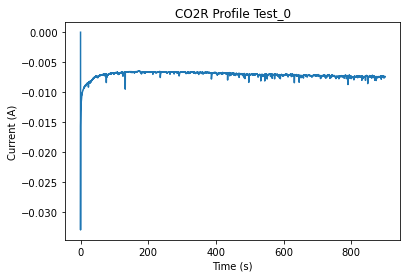

The current at the end of the run is 0.007383232936263 A
the previous X_samples matrix imported and is currently active is [[ 1.  -0.2 16. ]]
This is the random index chosen for this run = [133]
New candidates composition to be added to trainset: tensor([[ 0.3000, -0.4000, 10.5000]], dtype=torch.float64)
The following is to be run: awnb1p10004 on Test_1
Next experiment to run: [0.3, -0.4, 10.5]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RUN EXPERIMENT
PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA
iR for deposition = 42.119432182519105 ohms
Mass Loading All = 0.008054485307459332
Mass Loading Truncated (10 s) = 0.00446000432828843


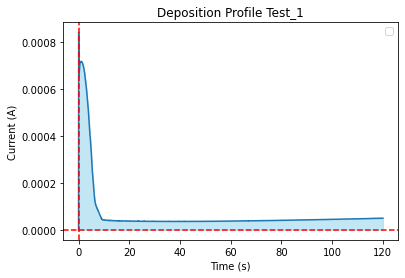

7.728833111286804e-07
-1.7035964816614069e-06
1.7638362770355798e-07
-2.969312440370686e-07
3.6311477913386625e-07
-4.865628966399527e-07
4.525792256515615e-07
-5.732610830477824e-07
5.387012222968224e-07
-6.611987402038721e-07
[1.23823990e-06 2.36657436e-07 4.24838838e-07 5.12920154e-07
 5.99949981e-07]
[-1.23823990e-06 -2.36657436e-07 -4.24838838e-07 -5.12920154e-07
 -5.99949981e-07]


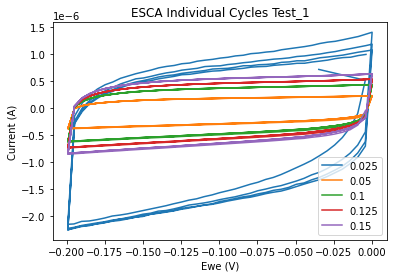

ECSA positive = -2.953888190173207e-06 F
ECSA negative = -2.953888190173207e-06 F


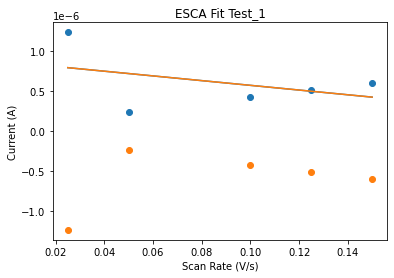

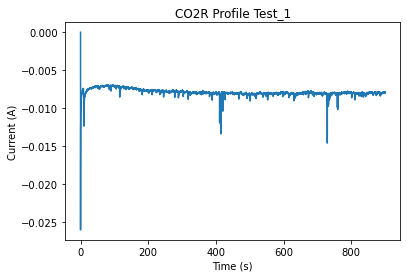

The current at the end of the run is 0.0080521740019321 A
the previous X_samples matrix imported and is currently active is [[ 1.  -0.2 16. ]
 [ 0.3 -0.4 10.5]]
This is the random index chosen for this run = [300]
New candidates composition to be added to trainset: tensor([[ 0.6000,  0.0000, 27.0000]], dtype=torch.float64)
The following is to be run: awnb1p10004 on Test_2
Next experiment to run: [0.6, 0.0, 27.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RUN EXPERIMENT
PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA
iR for deposition = 91.57339776407088 ohms
Mass Loading All = 0.001820019024304654
Mass Loading Truncated (10 s) = 0.0016306856079349548


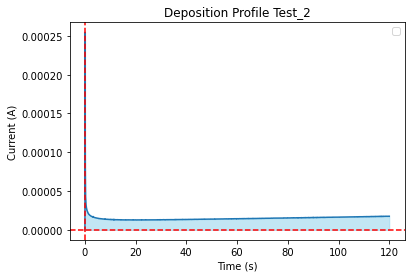

c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
-5.7190157498610006e-08
5.130432856326195e-09
-1.2712101060685654e-07
5.387455681571396e-08
-1.7852791067696216e-07
7.834719362165288e-08
-2.0048698168295687e-07
1.0132426719877685e-07
-2.2295946600081606e-07
[2.85950787e-08 6.61257217e-08 1.16201234e-07 1.39417088e-07
 1.62141867e-07]
[-2.85950787e-08 -6.61257217e-08 -1.16201234e-07 -1.39417088e-07
 -1.62141867e-07]


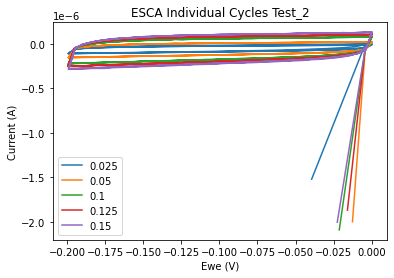

ECSA positive = 1.0480384570524049e-06 F
ECSA negative = 1.0480384570524049e-06 F


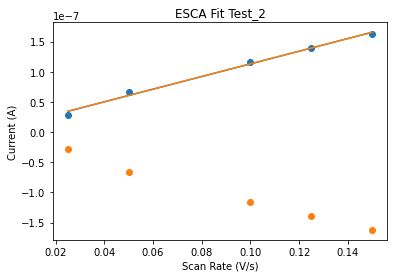

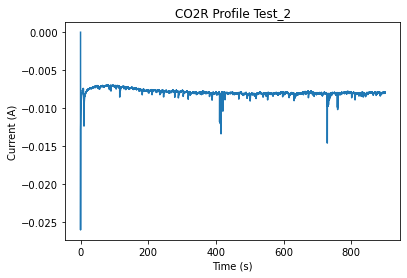

The current at the end of the run is 0.0080521740019321 A
the previous X_samples matrix imported and is currently active is [[ 1.  -0.2 16. ]
 [ 0.3 -0.4 10.5]
 [ 0.6  0.  27. ]]
This is the random index chosen for this run = [408]
New candidates composition to be added to trainset: tensor([[ 0.8000, -0.1000, 21.5000]], dtype=torch.float64)
The following is to be run: awnb1p10004 on Test_3
Next experiment to run: [0.8, -0.1, 21.5]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RUN EXPERIMENT
PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA
iR for deposition = 91.57339776407088 ohms
Mass Loading All = 0.001820019024304654
Mass Loading Truncated (10 s) = 0.0016306856079349548


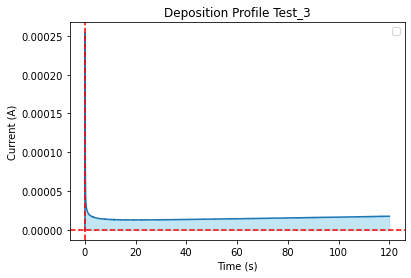

c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\Users\Blackr\Anaconda3\envs\CCUS\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
-5.7190157498610006e-08
5.130432856326195e-09
-1.2712101060685654e-07
5.387455681571396e-08
-1.7852791067696216e-07
7.834719362165288e-08
-2.0048698168295687e-07
1.0132426719877685e-07
-2.2295946600081606e-07
[2.85950787e-08 6.61257217e-08 1.16201234e-07 1.39417088e-07
 1.62141867e-07]
[-2.85950787e-08 -6.61257217e-08 -1.16201234e-07 -1.39417088e-07
 -1.62141867e-07]


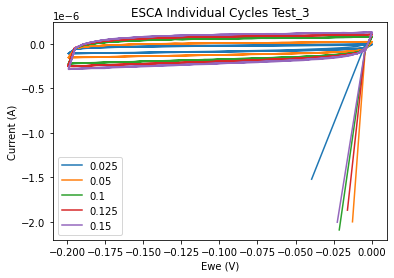

ECSA positive = 1.0480384570524049e-06 F
ECSA negative = 1.0480384570524049e-06 F


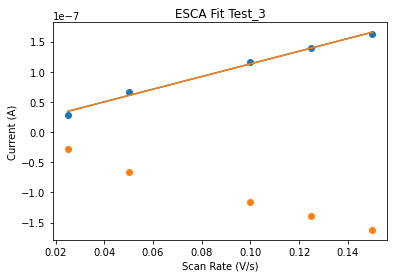

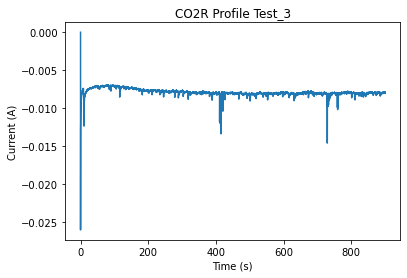

The current at the end of the run is 0.0080521740019321 A
the previous X_samples matrix imported and is currently active is [[ 1.  -0.2 16. ]
 [ 0.3 -0.4 10.5]
 [ 0.6  0.  27. ]
 [ 0.8 -0.1 21.5]]
This is the random index chosen for this run = [107]
New candidates composition to be added to trainset: tensor([[ 0.1000,  0.4000, 49.0000]], dtype=torch.float64)
The following is to be run: awnb1p10004 on Test_4
Next experiment to run: [0.1, 0.4, 49.0]
RUN EXPERIMENT
PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Blackr/Documents/CCUS/MAPs/Initiate/2023_12_01/Test_4_ch1_OCV_1.csv'

In [5]:
# The below starts the campaign, pulling in the correct information from the active learning protocol

# Important to define the test number that is to be run. exp_start = 0 indicated a new campaign.
exp_start = 0

for exp_count in range(exp_start,number_runs): 
    # Update test name and dictionary
    test = f'Test_{exp_count}' # current experiment name - note in the potentiostat.py there is built in protection incase forget to change
    print(f'The following is to be run: {experiment_name} on {test}')

    # Initialize the active learning
    next_experiment = ActiveLearning(root_path, experiment_name, test, exp_count)
    
    # Initialize the experiment_update module
    experiment_update = PostProcessing(root_path, experiment_name, test)
    
    # Pick the first experiment randomly OR follow what was provided:
    if exp_count == 0:
        
        #Call in data from previous method to be able to access here:
        with open(f'{root_path}{experiment_name}_saved_data.pkl', 'rb') as f:
            data = pickle.load(f)        
            
        next_experiment.determine_first_experiment(data)
        
        X_choice = list(np.array(data[f'{experiment_name}'][f'Test_{exp_count}']['AL']['X_sample'][0]))
        print(f'Initial experiment to run: {X_choice}')
        
        experiment_update.experiment_update(data, exp_count, X_choice)
        px = X_choice[0]
        
    else: # If this is not the first experiment (ie. you need to continue the campaign after an error)
        
        #Call in data from previous method to be able to access here:
        with open(f'{root_path}{experiment_name}_saved_data.pkl', 'rb') as f:
            data = pickle.load(f)

        #TODO: this will need to pull the last value from the previous test_name based on how it is stored, see Test_{i-1}
        X_choice = list(np.array(data[f'{experiment_name}'][f'Test_{exp_count-1}']['AL']['X_sample'][-1]))
        
        print(f'Next experiment to run: {X_choice}')
        
        experiment_update.experiment_update(data, exp_count, X_choice)
        px = X_choice[0]

    while True:
        next_exp = input('Understood what experiment to run next? Type -ok- to continue:')
        if next_exp == 'ok':
            break
##############################################

    print("RUN EXPERIMENT")
    #Todo - input code for automation here
    
    
    print("PROCESS DATA AND UPDATE ASSOCIATED OUTPUT MATRICES WITH NEW DATA")
    # Currently the data used is mock data of old excel files
    
    process_data = PostProcessing(root_path, experiment_name, test = f'Test_{exp_count}')
    
    process_data.curate_deposition()
    process_data.determine_mass_loading(truncate_time = 10)
    process_data.curate_characterization()
    process_data.determine_ESCA()
    process_data.curate_performance_proxy()
    process_data.determine_performance_proxy()
    
##############################################        
    
    # Run the optimizer
    next_experiment.determine_next_experiment_random(data) #random for now, to ensure everything works